# Death's Dice | Pi Day Things
Idea from 3blue1brown tweet found [here](https://twitter.com/3blue1brown/status/1503423352207147010?s=21).

So every year Death comes to you and rolls "dice" to determine whether you live or die. You only die when rolling the pair of dice yields "snake eyes" -- both dice rolled 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
class Dice:
    def __init__(self, sides):
        self.sides = sides
        self.values = [i+1 for i in range(self.sides)]
    
    def roll(self):
        return random.choice(self.values)
    
    def double_roll(self):
        return (self.roll(), self.roll())

In [9]:
class Simulation:
    def __init__(self, years):
        self.years = years
        self.dices = []
        self.prob_immortal = 1
        for i in range(years):
            dice = Dice(2+(i*2))
            self.dices.append(dice)
        self.prob_immortal_over_time = []
        self.times = []
    
    def run(self):
        statsCycle = 100
        count = 0
        for i in range(self.years):
            dice = self.dices[i]
            probLiving = 1 - (1/dice.sides)**2
            self.prob_immortal *= probLiving
            # save stats every year to internal variables
            self.times.append(i)
            self.prob_immortal_over_time.append(self.prob_immortal)
            # save stats every so often to file
            count += 1
            if(count == statsCycle):
                with open("stats.txt","a") as f:
                    f.write(f"year: {i}\nProbLiving: {probLiving}\nProbImmortal: {self.prob_immortal}\n")
                    f.write(f"probImmortal closeness to 2/pi: {self.prob_immortal/(2/np.pi)}\n\n")
                count = 0
        print("sim fin")

In [10]:
sim = Simulation(10000)

In [11]:
sim.run()

sim fin


Text(0, 0.5, 'Probability of Living')

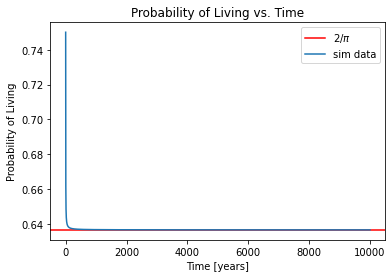

In [12]:
plt.figure()
plt.axhline(y=2/np.pi, color='r', linestyle='-', label="$2/\pi$")
plt.plot(sim.times, sim.prob_immortal_over_time, label="sim data")
plt.title("Probability of Living vs. Time")
plt.legend()
plt.xlabel("Time [years]")
plt.ylabel("Probability of Living")